# Ejercicio SVM datos Eurocopa 2012
A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

## 1. Importa las librerias necesarias

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Carga los datos

In [97]:
df = pd.read_csv('data\Euro_2012_stats_TEAM.csv')
df.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [99]:
df['Shooting Accuracy'] = df['Shooting Accuracy'].str.replace('%','').astype(float)
df['% Goals-to-shots'] = df['% Goals-to-shots'].str.replace('%','').astype(float)
df['Passing Accuracy'] = df['Passing Accuracy'].str.replace('%','').astype(float)
df['Saves-to-shots ratio'] = df['Saves-to-shots ratio'].str.replace('%','').astype(float)


## 3. Obtener la matriz de correlación con TODAS las variables. ¿Hay algunas columnas que estén muy correlacionadas?

In [100]:
df.corr()

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Goals,1.000000,0.804193,0.403821,0.521210,0.533239,0.650109,0.200512,0.730437,0.023094,0.349330,...,0.143912,0.394424,0.663876,0.483833,0.703043,0.337709,-3.580574e-01,0.727830,0.727830,0.136067
Shots on target,0.804193,1.000000,0.611185,0.504487,0.049623,0.886090,0.212932,0.478610,-0.229945,0.210571,...,0.085059,0.218915,0.765949,0.658353,0.696263,0.544307,-3.340500e-01,0.821342,0.821342,0.249516
Shots off target,0.403821,0.611185,1.000000,-0.269946,-0.389095,0.887032,0.581655,0.126783,-0.173221,0.002284,...,0.086157,0.187128,0.615058,0.434815,0.344626,0.534186,-3.377661e-01,0.544974,0.544974,0.045973
Shooting Accuracy,0.521210,0.504487,-0.269946,1.000000,0.548827,0.125994,-0.198917,0.234263,-0.223483,0.485392,...,0.179562,0.220664,0.235577,0.406282,0.382686,0.163668,-1.883518e-01,0.377589,0.377589,-0.022610
% Goals-to-shots,0.533239,0.049623,-0.389095,0.548827,1.000000,-0.195113,-0.087481,0.480954,0.370202,0.384424,...,0.121014,0.238564,0.034561,0.014626,0.255441,-0.071731,-1.669397e-01,0.130146,0.130146,-0.022179
Total shots (inc. Blocked),0.650109,0.886090,0.887032,0.125994,-0.195113,1.000000,0.400121,0.299397,-0.234668,0.125738,...,0.148269,0.252407,0.766215,0.623288,0.589635,0.622268,-3.604662e-01,0.763336,0.763336,0.157812
Hit Woodwork,0.200512,0.212932,0.581655,-0.198917,-0.087481,0.400121,1.000000,-0.076923,-0.041345,0.020174,...,-0.230524,-0.200695,0.141180,0.303987,0.113657,0.319708,-2.820513e-01,0.204511,0.204511,-0.189466
Penalty goals,0.730437,0.478610,0.126783,0.234263,0.480954,0.299397,-0.076923,1.000000,0.537484,-0.020174,...,0.058761,0.135145,0.528185,0.114404,0.627220,0.085467,1.794872e-01,0.531727,0.531727,0.351866
Penalties not scored,0.023094,-0.229945,-0.173221,-0.223483,0.370202,-0.234668,-0.041345,0.537484,1.000000,-0.357830,...,0.051019,-0.149787,0.163643,-0.107169,0.210417,0.127603,5.374838e-01,0.084796,0.084796,0.480079
Headed goals,0.349330,0.210571,0.002284,0.485392,0.384424,0.125738,0.020174,-0.020174,-0.357830,1.000000,...,0.458773,0.578573,0.157215,0.117445,0.188786,0.067245,-3.429623e-01,0.216077,0.216077,-0.447214


<AxesSubplot:>

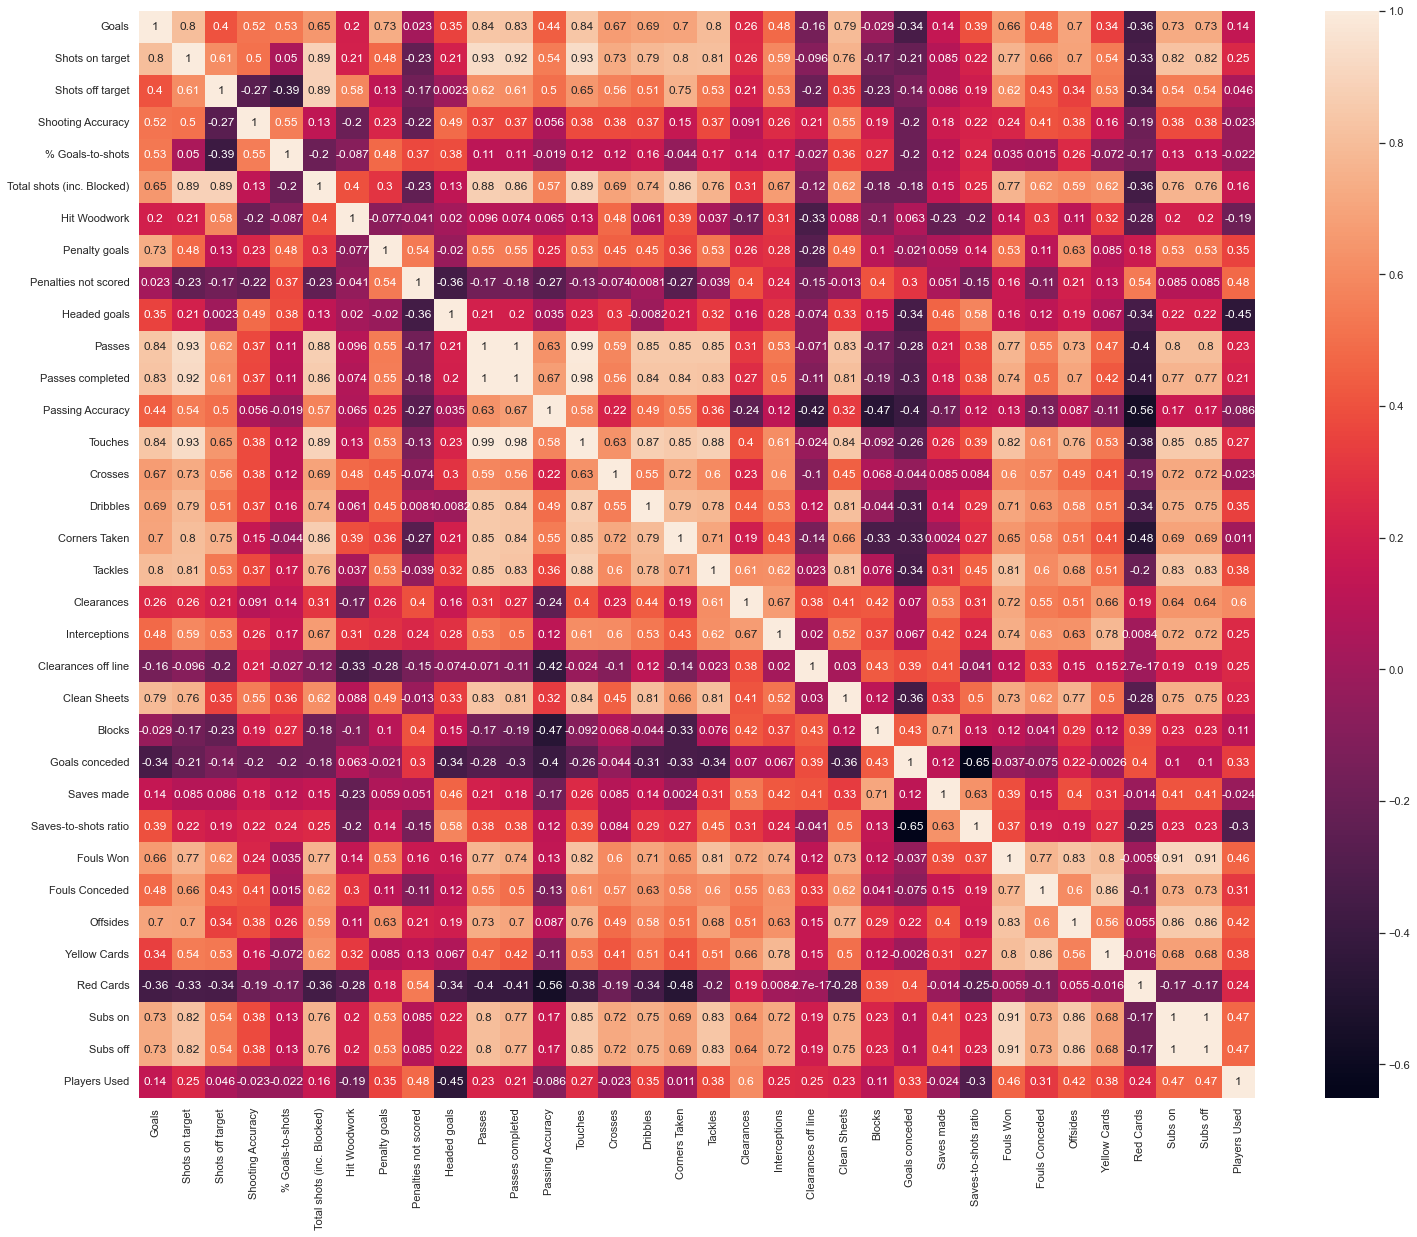

In [101]:
sns.set(rc = {'figure.figsize':(25,20)})
sns.heatmap(df.corr(), annot=True)

## 4. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

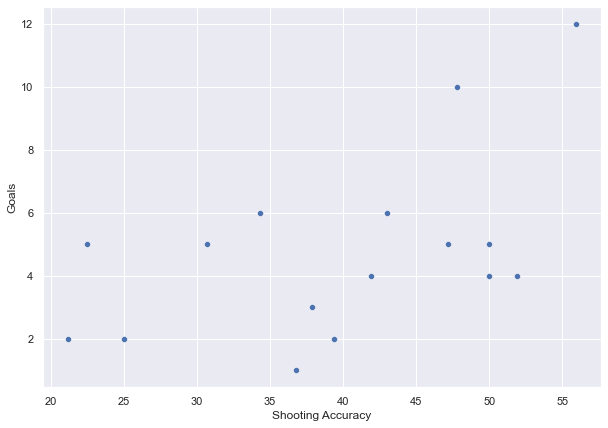

In [102]:
sns.set(rc = {'figure.figsize':(10,7)})
sns.scatterplot(x=df['Shooting Accuracy'], y=df['Goals']);

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df[['Shooting Accuracy']]

y = df[['Goals']]



X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y)

lin_reg = LinearRegression(n_jobs=-1) 
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)
predictions


print('The model performance for training set')
print('--------------------------------------')
print('MAE train', mean_absolute_error(y_train, lin_reg.predict(X_train)))
print('MSE train', mean_squared_error(y_train, lin_reg.predict(X_train)))
print('RMSE train', np.sqrt(mean_squared_error(y_train, lin_reg.predict(X_train))))
print('R2 score', r2_score(y_train, lin_reg.predict(X_train)))

The model performance for training set
--------------------------------------
MAE train 1.9787238179851914
MSE train 5.057414132073954
RMSE train 2.248869523132446
R2 score 0.5052529653405915


C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


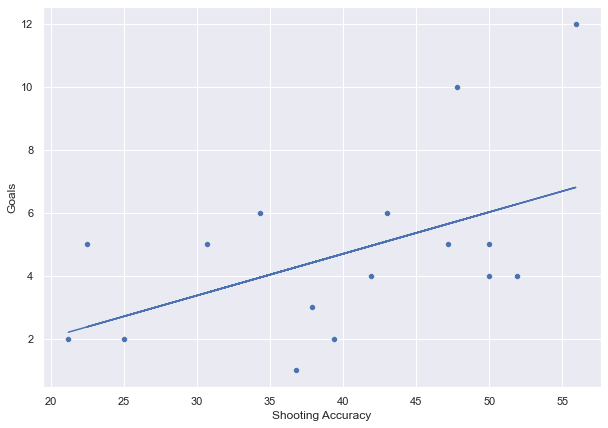

In [104]:
sns.set(rc = {'figure.figsize':(10,7)})
sns.scatterplot(x=df['Shooting Accuracy'], y=df['Goals']);
plt.plot(X, lin_reg.predict(X.values.reshape(-1,1)));

In [105]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_poly = poly_reg.transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

print('The model performance for training set')
print('--------------------------------------')
print('MAE train', mean_absolute_error(y_train, pol_reg.predict(X_poly)))
print('MSE train', mean_squared_error(y_train, pol_reg.predict(X_poly)))
print('RMSE train', np.sqrt(mean_squared_error(y_train, pol_reg.predict(X_poly))))
print('R2 score', r2_score(y_train, pol_reg.predict(X_poly)))

The model performance for training set
--------------------------------------
MAE train 1.6902037819821452
MSE train 3.668528313911363
RMSE train 1.9153402606094205
R2 score 0.5157946130126159


In [106]:
X_poly_test = poly_reg.transform(X_test)

print('The model performance for test set')
print('--------------------------------------')
print('MAE test', mean_absolute_error(y_test, pol_reg.predict(X_poly_test)))
print('MSE test', mean_squared_error(y_test, pol_reg.predict(X_poly_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, pol_reg.predict(X_poly_test))))
print('R2 score', r2_score(y_test, pol_reg.predict(X_poly_test)))

The model performance for test set
--------------------------------------
MAE test 2.479267224886745
MSE test 8.80892294208968
RMSE test 2.9679829753705933
R2 score -0.2255892788994338


In [107]:
X_all_poly = poly_reg.transform(X)

C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Shooting Accuracy', ylabel='Goals'>

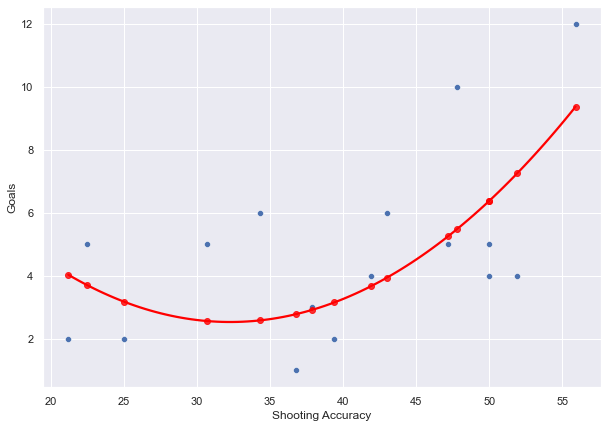

In [111]:
sns.scatterplot(x=df['Shooting Accuracy'], y=df['Goals']);
sns.regplot(X, pol_reg.predict(X_all_poly), color='red', order = 2)

C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


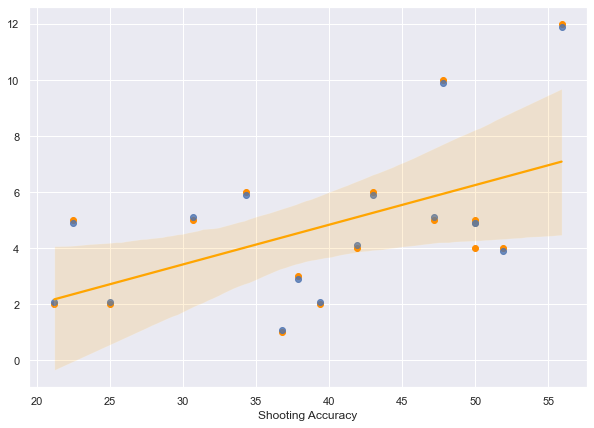

In [109]:
from sklearn.svm import SVR

svm_clf = SVR(C=100)
svm_clf.fit(X, y)

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(X, y).predict(X)

plt.scatter(X, y, color='darkorange', label='data')
sns.regplot(X, svr_rbf.predict(X), line_kws={'color':'orange'})

plt.show();

## 5. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

X1 = df[['% Goals-to-shots', 'Total shots (inc. Blocked)', 'Corners Taken', 'Passes', 'Dribbles']]

y1 = df['Goals'].astype('category')



X_train, X_test, y_train, y_test = train_test_split(X1,
                                                    y1)

In [165]:
X1

,% Goals-to-shots,Total shots (inc. Blocked),Corners Taken,Passes,Dribbles
0,16.0,32,14,1076,42
1,12.9,39,21,1565,68
2,20.0,27,16,1298,32
3,17.2,40,16,1488,60
4,6.5,65,28,2066,76
5,15.6,80,35,2774,60
6,19.2,32,10,1187,53
7,7.5,110,30,3016,75
8,4.1,60,22,1556,49
9,5.2,48,14,1059,39


In [166]:
from sklearn.metrics import accuracy_score
model1 = LogisticRegression()
model1.fit(X_train, y_train)

predictions = model1.predict(X_test)

accuracy_score(y_test, predictions)

C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.25

In [167]:
from sklearn import svm

svm_clf = svm.SVC()

svm_clf.fit(X_train, y_train)

predictions = svm_clf.predict(X_test)

accuracy_score(y_test, predictions)

0.25

In [168]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier()

rnd_clf.fit(X_train, y_train)

predictions = rnd_clf.predict(X_test)

accuracy_score(y_test, predictions)

0.25

In [171]:
import warnings
warnings.filterwarnings('ignore')

In [172]:
X_test_2 = pd.DataFrame({'Goals to shot': [40.0],
                     'Total shots(inc.Blocked)': [102],
                     'Corners Taken': [5],
                     'Passes': [82], 
                     'Dribbles': [23]})

In [173]:
print('logistic regression: ', model1.predict(X_test_2))
print('SVM: ', svm_clf.predict(X_test_2))
print('Random forest: ', rnd_clf.predict(X_test_2))

logistic regression:  [2]
SVM:  [5]
Random forest:  [5]
